# Fintech Sector Portfolio Analysis

(Insert project description)

(Insert table of contents with clickable anchor links)

In [1]:
import pandas as pd
from pathlib import Path
from MCForecastTools import MCSimulation
import yfinance as yf

## Collect and Clean Data

### Create a function to generate a daily returns DataFrame for a given list of stocks within a fintech sector

In [2]:
def get_daily_returns_df(yf_tickers, ticker_names, period):
    """
    Returns a pandas DataFrame where each column are daily returns for the provided stocks. 
    Prints out each step of the data
    
    Parameters
    ----------
    yf_tickers: yfinance.Tickers()
        a yfinance Tickers object containing desired stocks, currently assumes that there will be 3 stocks 
    ticker_names: list(str)
        a python list of ticker strings, assumes that the length of the list is equal to the number of stocks in yf_tickers
    period: str
        a python string that correlates to yfinance.Tickers() period parameter (ex: '1d', '2m', '5y', etc.)
        
    Returns
    -------
    pandas.DataFrame
        concatenated DataFrame with each stock's daily return data
    
    """
    
    # create pandas DataFrames for each stock in the yf ticker object, based on provided time period
    t1_df = yf_tickers.tickers[ticker_names[0]].history(period=period)
    t2_df = yf_tickers.tickers[ticker_names[1]].history(period=period)
    t3_df = yf_tickers.tickers[ticker_names[2]].history(period=period)

    # print out each DataFrame to verify data collection 
    print(f'{ticker_names[0]} DataFrame')
    display(t1_df.head())
    display(t1_df.tail())

    print(f'{ticker_names[1]} DataFrame')
    display(t2_df.head())
    display(t2_df.tail())

    print(f'{ticker_names[2]} DataFrame')
    display(t3_df.head())
    display(t3_df.tail())
    print('\n')

    # select only the close column from the DataFrames 
    t1_df = t1_df[['Close']]
    t2_df = t2_df[['Close']]
    t3_df = t3_df[['Close']]

    # concat close data into one DataFrame 
    daily_returns_df = pd.concat([t1_df, t2_df, t3_df], axis=1)

    # rename columns to each stock ticker instead of just "Close"
    daily_returns_df.columns = ticker_names

    # print out the resulting DataFrame to verify correct closing price data
    print(f'Closing price DataFrame for {ticker_names[0]}, {ticker_names[1]}, {ticker_names[2]}')
    display(daily_returns_df.head())
    display(daily_returns_df.tail())
    print('\n')

    # convert closing prices to daily returns 
    daily_returns_df = daily_returns_df.pct_change().dropna()

    # print final daily returns DataFrame
    print(f'Daily returns DataFrame for {ticker_names[0]}, {ticker_names[1]}, {ticker_names[2]}')
    display(daily_returns_df.head())
    display(daily_returns_df.tail())

    return daily_returns_df

In [3]:
# definte stock tickers for each sector 
paytech_ticker_names = ['PYPL', 'SQ', 'MA']
lending_ticker_names = ['TREE', 'LC', 'BKI']
banking_ticker_names = ['FISV', 'JKHY', 'FIS']

### Get 5 years of data for Paytech sector - PayPal, Square, and MasterCard

In [4]:
# create yfinance ticker object for paytech stocks
paytech_tickers = yf.Tickers('pypl sq ma')

# use tickers and 5 year period to get 5 years of paytech stock data 
paytech_daily_returns =  get_daily_returns_df(paytech_tickers, paytech_ticker_names, '5y')

PYPL DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,75.589996,75.744003,68.610001,70.970001,26283600,0,0
2017-12-05 00:00:00-05:00,69.809998,72.750000,69.610001,71.199997,16634000,0,0
2017-12-06 00:00:00-05:00,70.889999,73.199997,70.830002,73.139999,9331400,0,0
2017-12-07 00:00:00-05:00,73.250000,74.069000,73.250000,73.690002,7937700,0,0
2017-12-08 00:00:00-05:00,74.709999,74.709999,72.599998,72.910004,8350400,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,79.930000,82.919998,79.639999,79.930000,11282600,0,0
2022-11-29 00:00:00-05:00,79.230003,80.750000,77.260002,77.639999,15491100,0,0
2022-11-30 00:00:00-05:00,77.699997,79.110001,75.320000,78.410004,25747300,0,0
2022-12-01 00:00:00-05:00,79.110001,80.746002,78.139999,78.529999,15189000,0,0
2022-12-02 00:00:00-05:00,76.820000,77.059998,74.519997,74.660004,24212900,0,0


SQ DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,38.410000,38.689999,35.900002,36.869999,29566900,0,0
2017-12-05 00:00:00-05:00,36.750000,38.590000,36.740002,37.599998,21276200,0,0
2017-12-06 00:00:00-05:00,37.730000,39.770000,37.270000,37.610001,28820400,0,0
2017-12-07 00:00:00-05:00,39.325001,39.459999,37.959999,38.730000,23721600,0,0
2017-12-08 00:00:00-05:00,39.610001,39.790001,37.939999,38.090000,20917800,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,61.910000,63.830002,61.119999,61.369999,7239900,0,0
2022-11-29 00:00:00-05:00,62.070000,63.889999,61.730000,62.110001,8219900,0,0
2022-11-30 00:00:00-05:00,62.099998,68.000000,61.852001,67.769997,14298600,0,0
2022-12-01 00:00:00-05:00,68.019997,69.239998,66.660004,69.169998,9430000,0,0
2022-12-02 00:00:00-05:00,67.269997,68.940002,66.620003,68.180000,7716000,0,0


MA DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,145.915705,146.567808,139.550392,139.599045,7490100,0.0,0
2017-12-05 00:00:00-05:00,139.861834,142.411865,136.854370,141.253647,6807100,0.0,0
2017-12-06 00:00:00-05:00,141.195199,144.115069,140.757207,143.482422,3752000,0.0,0
2017-12-07 00:00:00-05:00,143.570066,146.392617,143.570066,145.458252,3417900,0.0,0
2017-12-08 00:00:00-05:00,146.402317,146.421787,145.185704,145.886475,2521500,0.0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,346.679993,350.230011,343.230011,344.589996,2226200,0.0,0
2022-11-29 00:00:00-05:00,343.649994,344.720001,340.750000,343.130005,1724200,0.0,0
2022-11-30 00:00:00-05:00,342.850006,356.399994,341.480011,356.399994,4251300,0.0,0
2022-12-01 00:00:00-05:00,357.989990,361.579987,354.049988,360.799988,3374700,0.0,0
2022-12-02 00:00:00-05:00,357.450012,362.290009,356.059998,360.059998,2015500,0.0,0




Closing price DataFrame for PYPL, SQ, MA


,PYPL,SQ,MA
Date,,,
2017-12-04 00:00:00-05:00,70.970001,36.869999,139.599045
2017-12-05 00:00:00-05:00,71.199997,37.599998,141.253647
2017-12-06 00:00:00-05:00,73.139999,37.610001,143.482422
2017-12-07 00:00:00-05:00,73.690002,38.730000,145.458252
2017-12-08 00:00:00-05:00,72.910004,38.090000,145.886475


,PYPL,SQ,MA
Date,,,
2022-11-28 00:00:00-05:00,79.930000,61.369999,344.589996
2022-11-29 00:00:00-05:00,77.639999,62.110001,343.130005
2022-11-30 00:00:00-05:00,78.410004,67.769997,356.399994
2022-12-01 00:00:00-05:00,78.529999,69.169998,360.799988
2022-12-02 00:00:00-05:00,74.660004,68.180000,360.059998




Daily returns DataFrame for PYPL, SQ, MA


,PYPL,SQ,MA
Date,,,
2017-12-05 00:00:00-05:00,0.003241,0.019799,0.011853
2017-12-06 00:00:00-05:00,0.027247,0.000266,0.015779
2017-12-07 00:00:00-05:00,0.007520,0.029779,0.013771
2017-12-08 00:00:00-05:00,-0.010585,-0.016525,0.002944
2017-12-11 00:00:00-05:00,0.005212,0.005513,0.006605


,PYPL,SQ,MA
Date,,,
2022-11-28 00:00:00-05:00,-0.001873,-0.031714,-0.019073
2022-11-29 00:00:00-05:00,-0.028650,0.012058,-0.004237
2022-11-30 00:00:00-05:00,0.009918,0.091129,0.038673
2022-12-01 00:00:00-05:00,0.001530,0.020658,0.012346
2022-12-02 00:00:00-05:00,-0.049280,-0.014313,-0.002051


### Get 5 years of data for Lending sector - LendingTree, LendingClub, Black Knight

In [5]:
# create yfinance ticker object for lending stocks
lending_tickers = yf.Tickers('tree lc bki')

# use tickers and 5 year period to get 5 years of lending stock data 
lending_daily_returns =  get_daily_returns_df(lending_tickers, lending_ticker_names, '5y')

TREE DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,309.850006,316.250000,301.450012,303.399994,246900,0,0
2017-12-05 00:00:00-05:00,301.950012,313.299988,298.609985,305.200012,185000,0,0
2017-12-06 00:00:00-05:00,305.350006,310.799988,304.200012,306.899994,190300,0,0
2017-12-07 00:00:00-05:00,307.049988,316.600006,305.980011,311.250000,125300,0,0
2017-12-08 00:00:00-05:00,314.950012,319.429993,308.899994,315.049988,258700,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,23.379999,23.379999,22.200001,22.370001,235900,0,0
2022-11-29 00:00:00-05:00,22.500000,23.459999,22.010000,23.330000,262400,0,0
2022-11-30 00:00:00-05:00,23.200001,23.990000,21.750000,23.950001,376000,0,0
2022-12-01 00:00:00-05:00,24.000000,25.240000,23.170000,25.120001,256900,0,0
2022-12-02 00:00:00-05:00,24.250000,25.110001,23.629999,24.980000,204100,0,0


LC DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,21.950001,22.275000,21.350000,21.850000,1400220,0,0.0
2017-12-05 00:00:00-05:00,21.850000,21.950001,21.250000,21.250000,1117300,0,0.0
2017-12-06 00:00:00-05:00,21.150000,21.400000,20.799999,21.250000,1079140,0,0.0
2017-12-07 00:00:00-05:00,18.549999,19.700001,16.450001,17.950001,9593000,0,0.0
2017-12-08 00:00:00-05:00,18.700001,18.700001,17.299999,17.549999,4030720,0,0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,10.37,10.470,9.920,10.06,2000200,0,0.0
2022-11-29 00:00:00-05:00,10.04,10.435,10.040,10.26,859700,0,0.0
2022-11-30 00:00:00-05:00,10.14,10.395,9.930,10.31,1532500,0,0.0
2022-12-01 00:00:00-05:00,10.42,10.550,10.195,10.24,1034500,0,0.0
2022-12-02 00:00:00-05:00,10.19,10.375,9.990,10.18,1111000,0,0.0


BKI DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,45.299999,45.950001,44.450001,44.799999,1036300,0,0
2017-12-05 00:00:00-05:00,44.799999,45.549999,44.799999,44.900002,774600,0,0
2017-12-06 00:00:00-05:00,44.799999,45.099998,44.250000,44.349998,516100,0,0
2017-12-07 00:00:00-05:00,44.250000,45.125000,44.060001,45.049999,445400,0,0
2017-12-08 00:00:00-05:00,45.200001,45.724998,44.950001,45.549999,625700,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,62.549999,63.060001,61.070000,61.160000,469900,0,0
2022-11-29 00:00:00-05:00,60.959999,61.639999,60.349998,60.750000,853500,0,0
2022-11-30 00:00:00-05:00,61.000000,62.299999,60.470001,61.990002,1686800,0,0
2022-12-01 00:00:00-05:00,62.040001,63.310001,61.709999,61.950001,678500,0,0
2022-12-02 00:00:00-05:00,61.040001,62.130001,60.930000,61.389999,633500,0,0




Closing price DataFrame for TREE, LC, BKI


,TREE,LC,BKI
Date,,,
2017-12-04 00:00:00-05:00,303.399994,21.850000,44.799999
2017-12-05 00:00:00-05:00,305.200012,21.250000,44.900002
2017-12-06 00:00:00-05:00,306.899994,21.250000,44.349998
2017-12-07 00:00:00-05:00,311.250000,17.950001,45.049999
2017-12-08 00:00:00-05:00,315.049988,17.549999,45.549999


,TREE,LC,BKI
Date,,,
2022-11-28 00:00:00-05:00,22.370001,10.06,61.160000
2022-11-29 00:00:00-05:00,23.330000,10.26,60.750000
2022-11-30 00:00:00-05:00,23.950001,10.31,61.990002
2022-12-01 00:00:00-05:00,25.120001,10.24,61.950001
2022-12-02 00:00:00-05:00,24.980000,10.18,61.389999




Daily returns DataFrame for TREE, LC, BKI


,TREE,LC,BKI
Date,,,
2017-12-05 00:00:00-05:00,0.005933,-0.027460,0.002232
2017-12-06 00:00:00-05:00,0.005570,0.000000,-0.012250
2017-12-07 00:00:00-05:00,0.014174,-0.155294,0.015784
2017-12-08 00:00:00-05:00,0.012209,-0.022284,0.011099
2017-12-11 00:00:00-05:00,-0.019521,0.108262,0.001098


,TREE,LC,BKI
Date,,,
2022-11-28 00:00:00-05:00,-0.051717,-0.047348,-0.024406
2022-11-29 00:00:00-05:00,0.042915,0.019881,-0.006704
2022-11-30 00:00:00-05:00,0.026575,0.004873,0.020412
2022-12-01 00:00:00-05:00,0.048852,-0.006790,-0.000645
2022-12-02 00:00:00-05:00,-0.005573,-0.005859,-0.009040


### Get 5 years of data for Banking sector - Fiserv, Jack Henry & Associates, FIS (Fidelity National Information Services)

In [6]:
# create yfinance ticker object for banking stocks
banking_tickers = yf.Tickers('fisv jkhy fis')

# use tickers and 5 year period to get 5 years of lending stock data 
banking_daily_returns = get_daily_returns_df(banking_tickers, banking_ticker_names, '5y')

FISV DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,65.695000,66.555000,65.464996,66.120003,2270000,0,0.0
2017-12-05 00:00:00-05:00,66.120003,66.285004,65.309998,65.440002,1550200,0,0.0
2017-12-06 00:00:00-05:00,65.570000,65.754997,65.004997,65.279999,1658200,0,0.0
2017-12-07 00:00:00-05:00,65.154999,65.699997,65.010002,65.599998,1431200,0,0.0
2017-12-08 00:00:00-05:00,65.945000,66.059998,65.635002,65.860001,1142400,0,0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,102.150002,102.889999,101.470001,101.760002,2867800,0,0.0
2022-11-29 00:00:00-05:00,101.739998,102.750000,101.209999,101.519997,3194500,0,0.0
2022-11-30 00:00:00-05:00,100.720001,104.989998,100.720001,104.360001,5573000,0,0.0
2022-12-01 00:00:00-05:00,104.360001,105.500000,103.980003,105.029999,3086900,0,0.0
2022-12-02 00:00:00-05:00,103.370003,105.849998,103.370003,105.459999,2881700,0,0.0


JKHY DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,108.367447,109.947863,107.742848,109.285416,380300,0.0,0
2017-12-05 00:00:00-05:00,109.257026,109.493616,108.433699,108.613503,430000,0.0,0
2017-12-06 00:00:00-05:00,109.787002,111.130829,109.626116,109.663971,364300,0.0,0
2017-12-07 00:00:00-05:00,109.673412,110.657625,109.455754,110.544060,432600,0.0,0
2017-12-08 00:00:00-05:00,110.988864,111.329553,110.563005,110.998329,202100,0.0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,189.569010,191.842999,187.813639,188.302353,402500,0.00,0
2022-11-29 00:00:00-05:00,188.212594,189.140136,183.395324,185.409988,481600,0.00,0
2022-11-30 00:00:00-05:00,185.330002,190.360001,185.160004,189.350006,837600,0.49,0
2022-12-01 00:00:00-05:00,189.750000,191.610001,188.270004,190.729996,531800,0.00,0
2022-12-02 00:00:00-05:00,188.500000,192.330002,188.289993,191.600006,490000,0.00,0


FIS DataFrame


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-04 00:00:00-05:00,88.692211,88.757895,87.819552,87.857086,1668400,0.0,0
2017-12-05 00:00:00-05:00,88.025999,89.358452,87.547449,89.302147,2017200,0.0,0
2017-12-06 00:00:00-05:00,89.105100,89.649341,88.607779,89.424141,1817100,0.0,0
2017-12-07 00:00:00-05:00,89.546126,90.090367,89.330304,89.959000,2004000,0.0,0
2017-12-08 00:00:00-05:00,90.240478,90.493835,89.621175,89.940208,1683500,0.0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,65.330002,67.169998,65.169998,65.529999,6872700,0.0,0
2022-11-29 00:00:00-05:00,65.699997,68.680000,65.550003,67.529999,8373600,0.0,0
2022-11-30 00:00:00-05:00,67.930000,72.620003,67.709999,72.580002,13852900,0.0,0
2022-12-01 00:00:00-05:00,72.690002,74.300003,72.349998,73.180000,8105200,0.0,0
2022-12-02 00:00:00-05:00,72.750000,75.000000,72.589996,74.059998,8741500,0.0,0




Closing price DataFrame for FISV, JKHY, FIS


,FISV,JKHY,FIS
Date,,,
2017-12-04 00:00:00-05:00,66.120003,109.285416,87.857086
2017-12-05 00:00:00-05:00,65.440002,108.613503,89.302147
2017-12-06 00:00:00-05:00,65.279999,109.663971,89.424141
2017-12-07 00:00:00-05:00,65.599998,110.544060,89.959000
2017-12-08 00:00:00-05:00,65.860001,110.998329,89.940208


,FISV,JKHY,FIS
Date,,,
2022-11-28 00:00:00-05:00,101.760002,188.302353,65.529999
2022-11-29 00:00:00-05:00,101.519997,185.409988,67.529999
2022-11-30 00:00:00-05:00,104.360001,189.350006,72.580002
2022-12-01 00:00:00-05:00,105.029999,190.729996,73.180000
2022-12-02 00:00:00-05:00,105.459999,191.600006,74.059998




Daily returns DataFrame for FISV, JKHY, FIS


,FISV,JKHY,FIS
Date,,,
2017-12-05 00:00:00-05:00,-0.010284,-0.006148,0.016448
2017-12-06 00:00:00-05:00,-0.002445,0.009672,0.001366
2017-12-07 00:00:00-05:00,0.004902,0.008025,0.005981
2017-12-08 00:00:00-05:00,0.003963,0.004109,-0.000209
2017-12-11 00:00:00-05:00,0.000835,-0.003410,-0.001460


,FISV,JKHY,FIS
Date,,,
2022-11-28 00:00:00-05:00,-0.007123,-0.013687,-0.006820
2022-11-29 00:00:00-05:00,-0.002359,-0.015360,0.030520
2022-11-30 00:00:00-05:00,0.027975,0.021250,0.074782
2022-12-01 00:00:00-05:00,0.006420,0.007288,0.008267
2022-12-02 00:00:00-05:00,0.004094,0.004561,0.012025


## Data Analysis and Calculations

# Monte Carlo Simulations

## Reformat sector DataFrames to be usable by MCSimulation module

In [7]:
def get_data_for_mcsim(yf_tickers, ticker_names, period):
    """
    Returns a DataFrame with multi-level column names as required by the MCSimulation module 
    
    Parameters
    ----------
    yf_tickers: yfinance.Tickers()
        a yfinance Tickers object containing desired stocks, currently assumes that there will be 3 stocks 
    ticker_names: list(str)
        a python list of ticker strings, assumes that the length of the list is equal to the number of stocks in yf_tickers
    period: str
        a python string that correlates to yfinance.Tickers() period parameter (ex: '1d', '2m', '5y', etc.)
        
    Returns
    -------
    pandas.DataFrame
        concatenated DataFrame where the first level of columns is the stock ticker and the second is each stock's OHLCV data
    
    """
    
    # concat with Stock prices as first level column
    # remove empty dividends and stock splits columns 
    mc_data_df = pd.concat(
        [
            yf_tickers.tickers[ticker_names[0]].history(period=period).drop(['Dividends', 'Stock Splits'], axis=1),
            yf_tickers.tickers[ticker_names[1]].history(period=period).drop(['Dividends', 'Stock Splits'], axis=1),
            yf_tickers.tickers[ticker_names[2]].history(period=period).drop(['Dividends', 'Stock Splits'], axis=1),
        ],
        axis=1,
        keys=ticker_names
    )

    # rename Close to lower case so MCSimulation can select it 
    mc_data_df = mc_data_df.rename(columns={'Close': 'close'})
    
    display(mc_data_df.head())
    
    return mc_data_df

In [8]:
# format data for Paytech sector
paytech_df = get_data_for_mcsim(paytech_tickers, paytech_ticker_names, '5y')

PYPL                                   \
                                Open       High        Low      close   
Date                                                                    
2017-12-04 00:00:00-05:00  75.589996  75.744003  68.610001  70.970001   
2017-12-05 00:00:00-05:00  69.809998  72.750000  69.610001  71.199997   
2017-12-06 00:00:00-05:00  70.889999  73.199997  70.830002  73.139999   
2017-12-07 00:00:00-05:00  73.250000  74.069000  73.250000  73.690002   
2017-12-08 00:00:00-05:00  74.709999  74.709999  72.599998  72.910004   

                                            SQ                        \
                             Volume       Open       High        Low   
Date                                                                   
2017-12-04 00:00:00-05:00  26283600  38.410000  38.689999  35.900002   
2017-12-05 00:00:00-05:00  16634000  36.750000  38.590000  36.740002   
2017-12-06 00:00:00-05:00   9331400  37.730000  39.770000  37.270000   
2017-12-07 00:00:00-05:00   7937700  39.325001  39.459999  37.959999   
2017-12-08 00:00:00-05:00   8350400  39.610001  39.790001  37.939999   

                                                        MA              \
                               close    Volume        Open        High   
Date                                                                     
2017-12-04 00:00:00-05:00  36.869999  29566900  145.915721  146.567824   
2017-12-05 00:00:00-05:00  37.599998  21276200  139.861849  142.411880   
2017-12-06 00:00:00-05:00  37.610001  28820400  141.195259  144.115131   
2017-12-07 00:00:00-05:00  38.730000  23721600  143.570066  146.392617   
2017-12-08 00:00:00-05:00  38.090000  20917800  146.402348  146.421818   

                                                            
                                  Low       close   Volume  
Date                                                        
2017-12-04 00:00:00-05:00  139.550407  139.599060  7490100  
2017-12-05 00:00:00-05:00  136.854385  141.253662  6807100  
2017-12-06 00:00:00-05:00  140.757267  143.482483  3752000  
2017-12-07 00:00:00-05:00  143.570066  145.458252  3417900  
2017-12-08 00:00:00-05:00  145.185735  145.886505  2521500

In [9]:
# format data for lending sector
lending_df = get_data_for_mcsim(lending_tickers, lending_ticker_names, '5y')

TREE                                      \
                                 Open        High         Low       close   
Date                                                                        
2017-12-04 00:00:00-05:00  309.850006  316.250000  301.450012  303.399994   
2017-12-05 00:00:00-05:00  301.950012  313.299988  298.609985  305.200012   
2017-12-06 00:00:00-05:00  305.350006  310.799988  304.200012  306.899994   
2017-12-07 00:00:00-05:00  307.049988  316.600006  305.980011  311.250000   
2017-12-08 00:00:00-05:00  314.950012  319.429993  308.899994  315.049988   

                                          LC                                   \
                           Volume       Open       High        Low      close   
Date                                                                            
2017-12-04 00:00:00-05:00  246900  21.950001  22.275000  21.350000  21.850000   
2017-12-05 00:00:00-05:00  185000  21.850000  21.950001  21.250000  21.250000   
2017-12-06 00:00:00-05:00  190300  21.150000  21.400000  20.799999  21.250000   
2017-12-07 00:00:00-05:00  125300  18.549999  19.700001  16.450001  17.950001   
2017-12-08 00:00:00-05:00  258700  18.700001  18.700001  17.299999  17.549999   

                                          BKI                        \
                            Volume       Open       High        Low   
Date                                                                  
2017-12-04 00:00:00-05:00  1400220  45.299999  45.950001  44.450001   
2017-12-05 00:00:00-05:00  1117300  44.799999  45.549999  44.799999   
2017-12-06 00:00:00-05:00  1079140  44.799999  45.099998  44.250000   
2017-12-07 00:00:00-05:00  9593000  44.250000  45.125000  44.060001   
2017-12-08 00:00:00-05:00  4030720  45.200001  45.724998  44.950001   

                                               
                               close   Volume  
Date                                           
2017-12-04 00:00:00-05:00  44.799999  1036300  
2017-12-05 00:00:00-05:00  44.900002   774600  
2017-12-06 00:00:00-05:00  44.349998   516100  
2017-12-07 00:00:00-05:00  45.049999   445400  
2017-12-08 00:00:00-05:00  45.549999   625700

In [10]:
banking_df = get_data_for_mcsim(banking_tickers, banking_ticker_names, '5y')

FISV                                   \
                                Open       High        Low      close   
Date                                                                    
2017-12-04 00:00:00-05:00  65.695000  66.555000  65.464996  66.120003   
2017-12-05 00:00:00-05:00  66.120003  66.285004  65.309998  65.440002   
2017-12-06 00:00:00-05:00  65.570000  65.754997  65.004997  65.279999   
2017-12-07 00:00:00-05:00  65.154999  65.699997  65.010002  65.599998   
2017-12-08 00:00:00-05:00  65.945000  66.059998  65.635002  65.860001   

                                          JKHY                          \
                            Volume        Open        High         Low   
Date                                                                     
2017-12-04 00:00:00-05:00  2270000  108.367462  109.947879  107.742863   
2017-12-05 00:00:00-05:00  1550200  109.257026  109.493616  108.433699   
2017-12-06 00:00:00-05:00  1658200  109.787002  111.130829  109.626116   
2017-12-07 00:00:00-05:00  1431200  109.673427  110.657641  109.455769   
2017-12-08 00:00:00-05:00  1142400  110.988864  111.329553  110.563005   

                                                     FIS             \
                                close  Volume       Open       High   
Date                                                                  
2017-12-04 00:00:00-05:00  109.285431  380300  88.692219  88.757903   
2017-12-05 00:00:00-05:00  108.613503  430000  88.025984  89.358437   
2017-12-06 00:00:00-05:00  109.663971  364300  89.105070  89.649311   
2017-12-07 00:00:00-05:00  110.544075  432600  89.546126  90.090367   
2017-12-08 00:00:00-05:00  110.998329  202100  90.240478  90.493835   

                                                          
                                 Low      close   Volume  
Date                                                      
2017-12-04 00:00:00-05:00  87.819559  87.857094  1668400  
2017-12-05 00:00:00-05:00  87.547434  89.302132  2017200  
2017-12-06 00:00:00-05:00  88.607749  89.424110  1817100  
2017-12-07 00:00:00-05:00  89.330304  89.959000  2004000  
2017-12-08 00:00:00-05:00  89.621175  89.940208  1683500

In [11]:
# create MCSimulation object
mc_test = MCSimulation(
    portfolio_data=paytech_df,
    weights=[.50, .20, .30],
    num_simulation=500,
    num_trading_days=252*5
)

In [12]:
mc_test.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ethansilvas/Projects/fintech-sector-portfolio-analysis/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985573,0.998793,0.974389,1.016866,0.988415,1.006836,1.022445,1.007233,1.033914,1.003818,...,1.010489,0.979014,1.010538,0.990813,0.978621,1.026756,1.018383,0.977233,0.977391,0.973757
2,1.002490,0.970368,0.994871,0.994832,1.011909,1.021586,1.043617,1.009375,1.056797,0.960304,...,1.006973,0.972652,1.005223,0.985660,0.982975,1.002763,1.041691,0.956164,0.984768,0.949095
3,0.992017,0.982786,1.021918,1.001465,1.006323,1.031939,1.039480,1.018118,1.040657,0.935277,...,0.991934,0.964013,1.008792,0.989203,0.987498,0.995596,1.013168,0.989384,0.965795,0.926278
4,0.989261,0.971306,1.007593,1.017112,1.012771,1.022894,1.045091,1.023729,1.058988,0.960156,...,0.980670,0.951179,1.019651,1.002920,0.989140,1.010392,1.001957,1.003903,0.981596,0.938077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.530401,2.098805,2.577734,3.933449,2.532283,3.613679,1.517942,1.070609,0.925391,2.214701,...,4.461680,5.811761,2.819456,2.393056,1.917843,5.255375,5.324383,1.623011,2.694710,1.910381
1257,4.389077,2.163155,2.616567,3.924070,2.496834,3.679188,1.539091,1.051665,0.923659,2.182075,...,4.459106,5.885136,2.821304,2.315058,1.919415,5.254297,5.462273,1.645808,2.740011,1.838479
1258,4.360550,2.126897,2.594867,3.940949,2.507421,3.862433,1.515814,1.058744,0.902083,2.184480,...,4.468437,5.877789,2.868762,2.278026,1.892674,5.324108,5.328472,1.636931,2.736602,1.840174
1259,4.333132,2.119825,2.480863,4.020957,2.490102,3.919770,1.493830,1.067498,0.928884,2.226053,...,4.426833,5.872356,2.879132,2.353825,1.861198,5.312711,5.295967,1.592055,2.765588,1.878738


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

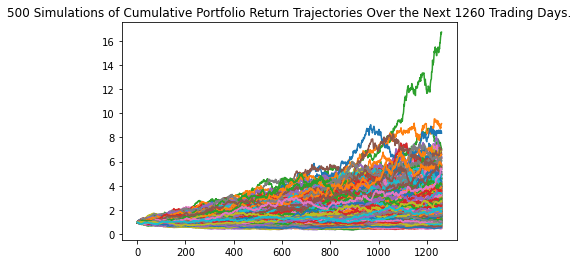

In [13]:
mc_test.plot_simulation()